___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

#### Load Dataset

In [2]:
df0 = pd.read_csv('Mall_Customers.csv')
df = df0.copy()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [6]:
df.rename(columns={"Annual Income (k$)":"Annual_Income",
          'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [7]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [8]:
df.duplicated().sum()

0

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [9]:
df.head(10)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [11]:
print('Mean of Age:', df.Age.mean())
print('Min of Age:', df.Age.min())
print('Max of Age:', df.Age.max())

Mean of Age: 38.85
Min of Age: 18
Max of Age: 70


In [12]:
df[(df['Spending_Score'] == df['Spending_Score'].max())]

,CustomerID,Gender,Age,Annual_Income,Spending_Score
11,12,Female,35,19,99


In [13]:
df[(df['Annual_Income'] == df['Annual_Income'].max())]

,CustomerID,Gender,Age,Annual_Income,Spending_Score
198,199,Male,32,137,18
199,200,Male,30,137,83


In [14]:
df.CustomerID.nunique()

200

In [15]:
df.CustomerID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [16]:
df.drop('CustomerID', axis=1, inplace=True)

In [17]:
df.head(2)

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81


In [18]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [19]:
df_num.corr()

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


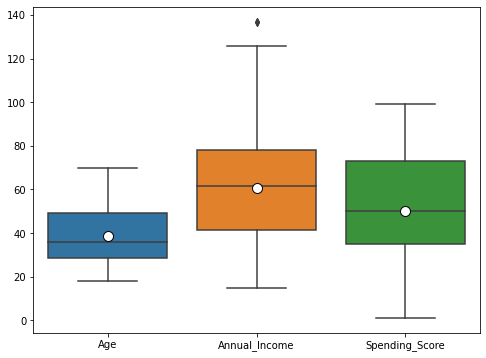

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

In [21]:
gender_income = df[['Gender', 'Annual_Income']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual_Income
0,Female,59.250000
1,Male,62.227273


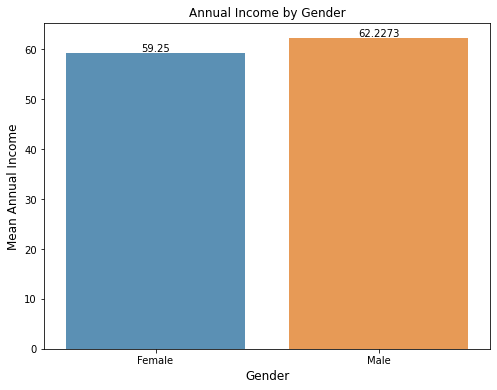

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(gender_income['Gender'], gender_income['Annual_Income'], alpha = 0.8)
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [23]:
gender_spending = df[['Gender', 'Spending_Score']].groupby('Gender', as_index = False).mean()
gender_spending

,Gender,Spending_Score
0,Female,51.526786
1,Male,48.511364


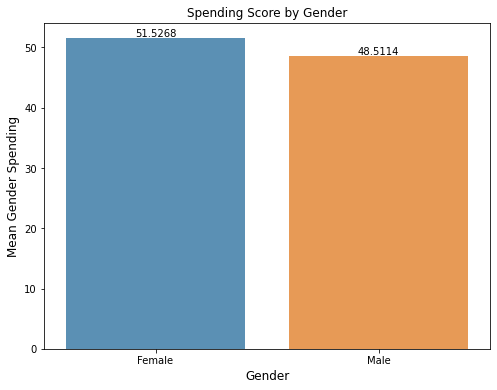

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(gender_spending['Gender'], gender_spending['Spending_Score'], alpha = 0.8)
plt.title('Spending Score by Gender')
plt.ylabel('Mean Gender Spending', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [27]:
gender_age = df[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
gender_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


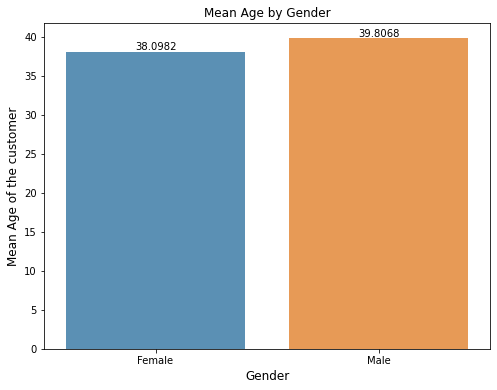

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(gender_age['Gender'], gender_age['Age'], alpha = 0.8)
plt.title('Mean Age by Gender')
plt.ylabel('Mean Age of the customer', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
for container in ax.containers:
    ax.bar_label(container);
plt.show()

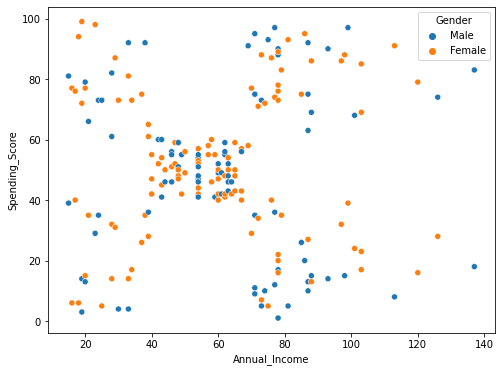

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Gender')
plt.show()

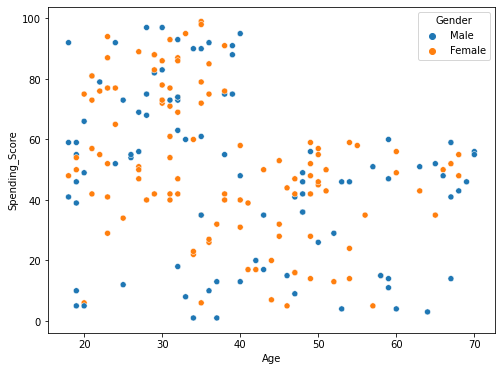

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(data=df, x='Age', y='Spending_Score', hue='Gender')
plt.show()

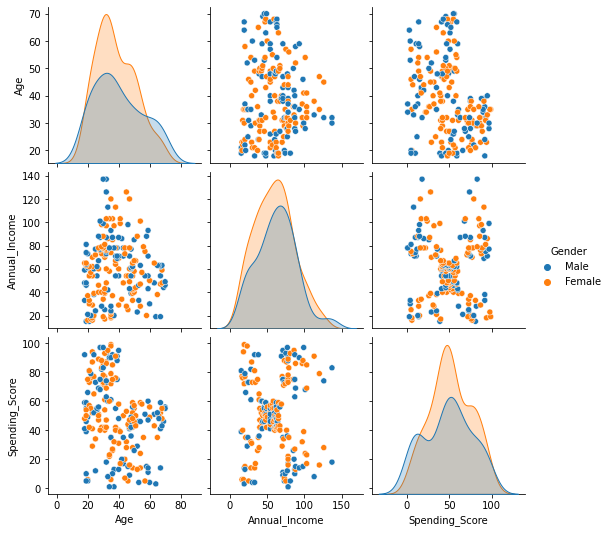

In [31]:
sns.pairplot(df, hue='Gender')
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [32]:
df1 = df.drop(columns="Gender")

In [33]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd


def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.

    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.

    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
        Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    # Sample n observations from D : P

    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')

    data_frame_sample = data_frame.sample(n=sampling_size)

    # Get the distance to their neirest neighbors in D : X

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    # Randomly simulate n points with the same variation as in D : Q.

    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()

    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)

    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)

    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    # return the hopkins score

    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')

    return x / (x + y)[0]

#### *ii. Determine optimal number of clusters*

In [34]:
hopkins(df1, df1.shape[0])

0.296911316114877

In [35]:
X1=df[['Age','Spending_Score']]
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [36]:
X1.shape

(200, 2)

In [37]:
hopkins(X1, X1.shape[0])

0.3101864561751604

Elbow Method

In [38]:
from sklearn.cluster import KMeans

In [39]:
ssd = []

K = range(2,11)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X1)
    ssd.append(model.inertia_)

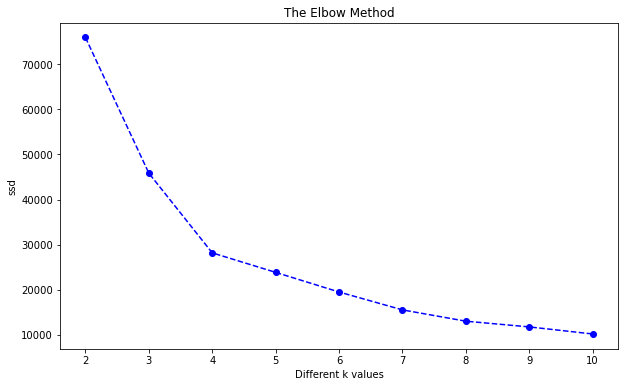

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("ssd") 
plt.title("The Elbow Method") 
plt.show()

In [41]:
ssd

[75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23838.248821646193,
 19483.1179104427,
 15514.193134351035,
 13006.48362885102,
 11738.020296954508,
 10173.039478114477]

In [42]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4327.334745
4     4355.130911
5     3968.924776
6     2507.709506
7     1268.463332
8     1564.980819
dtype: float64

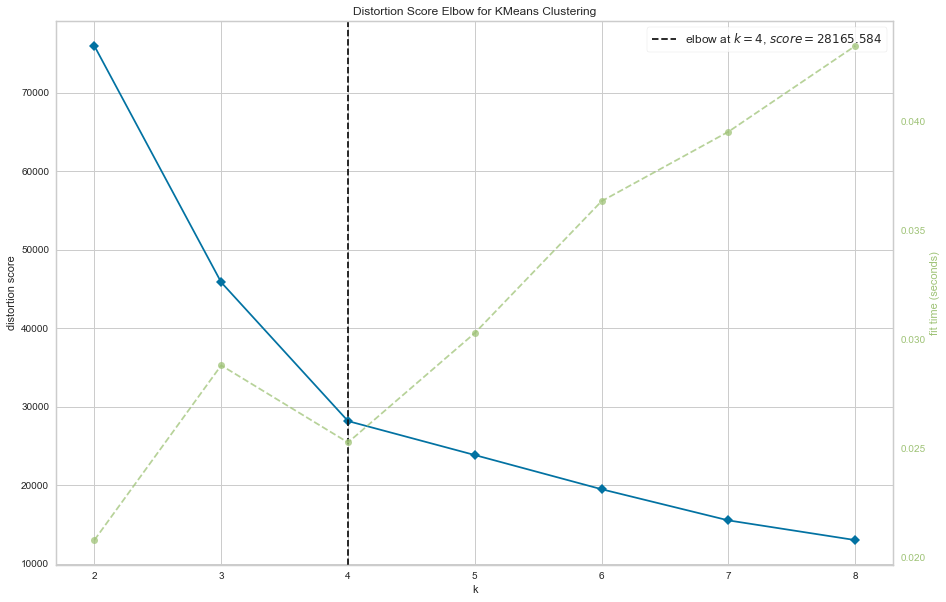

In [43]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2, 9), size=(1080, 720))

visualizer.fit(X1)        
visualizer.poof();

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


In [46]:
from sklearn.cluster import KMeans

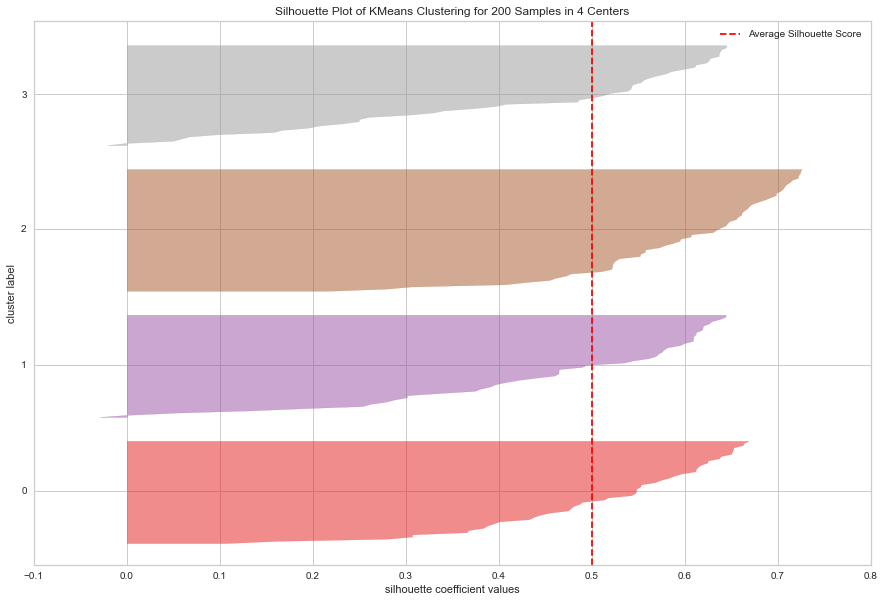

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer

model_ssd = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model_ssd, size=(1080, 720))

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof()

In [48]:
for i in range(model_ssd.n_clusters):
    label = (model_ssd.labels_ == i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.5960779476836082
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [49]:
modelk = KMeans(n_clusters=4, random_state=42)

In [50]:
y_kmeans = modelk.fit_predict(X1)

In [51]:
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [52]:
df['clusterx1_k'] = y_kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,clusterx1_k
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


In [53]:
df['clusterx1_k'].unique()

array([3, 2, 1, 0], dtype=int32)

In [54]:
df.groupby('Gender')['clusterx1_k'].value_counts()

Gender  clusterx1_k
Female  2              33
        3              29
        0              26
        1              24
Male    1              24
        2              24
        0              22
        3              18
Name: clusterx1_k, dtype: int64

In [55]:
df.groupby(['Gender', 'clusterx1_k'])['Age'].mean()

Gender  clusterx1_k
Female  0              54.153846
        1              43.583333
        2              29.787879
        3              28.620690
Male    0              57.545455
        1              43.000000
        2              30.708333
        3              26.000000
Name: Age, dtype: float64

#### *iv. Visualizing and Labeling All the Clusters*

In [56]:
centers = modelk.cluster_centers_ # merkez noktasi koordinatlari
centers

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

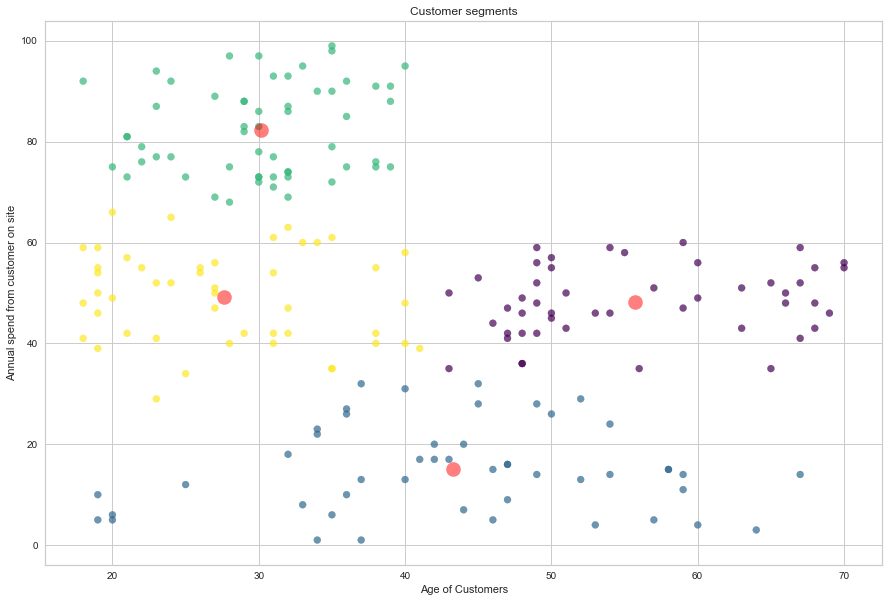

In [57]:
plt.figure(figsize=(15, 10))
plt.scatter(df["Age"], df["Spending_Score"],
            c=df.clusterx1_k, cmap="viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Customer segments')
plt.xlabel('Age of Customers')
plt.ylabel('Annual spend from customer on site');

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [58]:
X2=df[['Annual_Income','Spending_Score']]
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [59]:
X2.shape

(200, 2)

In [60]:
hopkins(X2, X2.shape[0])

0.3013874698071369

#### *ii. Determine optimal number of clusters*

In [61]:
ssd = []

K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters =k, random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)

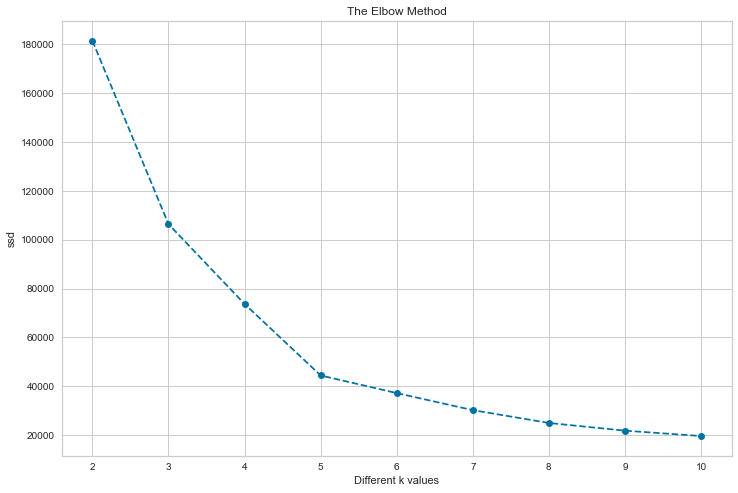

In [62]:
plt.figure(figsize=(12, 8))
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("ssd") 
plt.title("The Elbow Method");

In [63]:
ssd

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21862.09267218289,
 19672.072849014323]

In [64]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6974.157303
6     5247.817858
7     3149.746677
8     2190.019823
dtype: float64

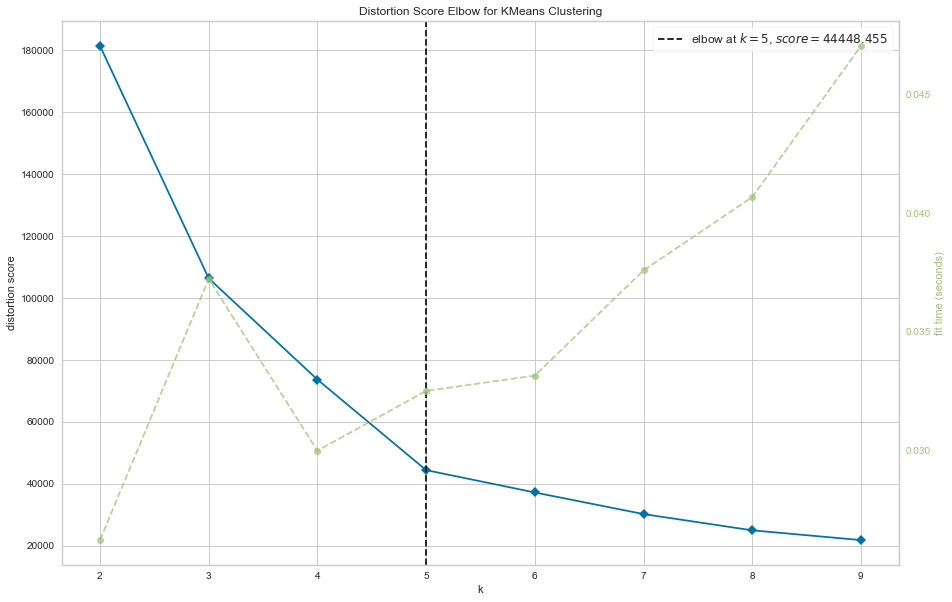

In [65]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2, 10), size=(1080, 720))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [66]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266


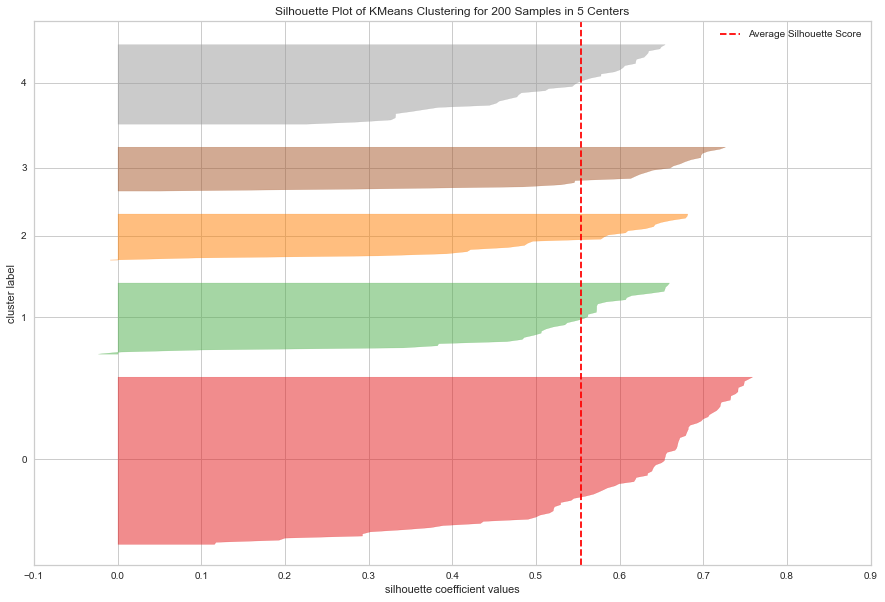

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [67]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4, size=(1080, 720))

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof()

#### *iii. Apply K Means*

In [68]:
model = KMeans(n_clusters=5, random_state=42)

In [69]:
y_kmeans = model.fit_predict(X2)

In [70]:
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [71]:
# add the new column to the dataframe
df['clusterx2_k'] = y_kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,clusterx1_k,clusterx2_k
0,Male,19,15,39,3,2
1,Male,21,15,81,2,3
2,Female,20,16,6,1,2
3,Female,23,16,77,2,3
4,Female,31,17,40,3,2


In [72]:
df['clusterx2_k'].unique()

array([2, 3, 0, 4, 1], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [73]:
centers = model.cluster_centers_ # merkez noktasi koordinatlaridir.
centers

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

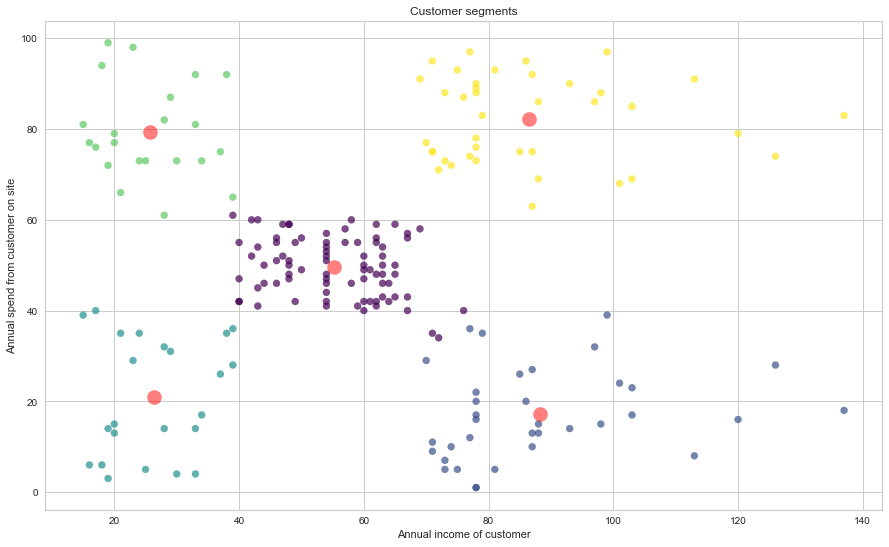

In [74]:
plt.figure(figsize=(15, 9))
plt.scatter(df["Annual_Income"], df["Spending_Score"], c = df.clusterx2_k, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site');

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [76]:
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [77]:
hc_ward = linkage(y=X1, method="ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

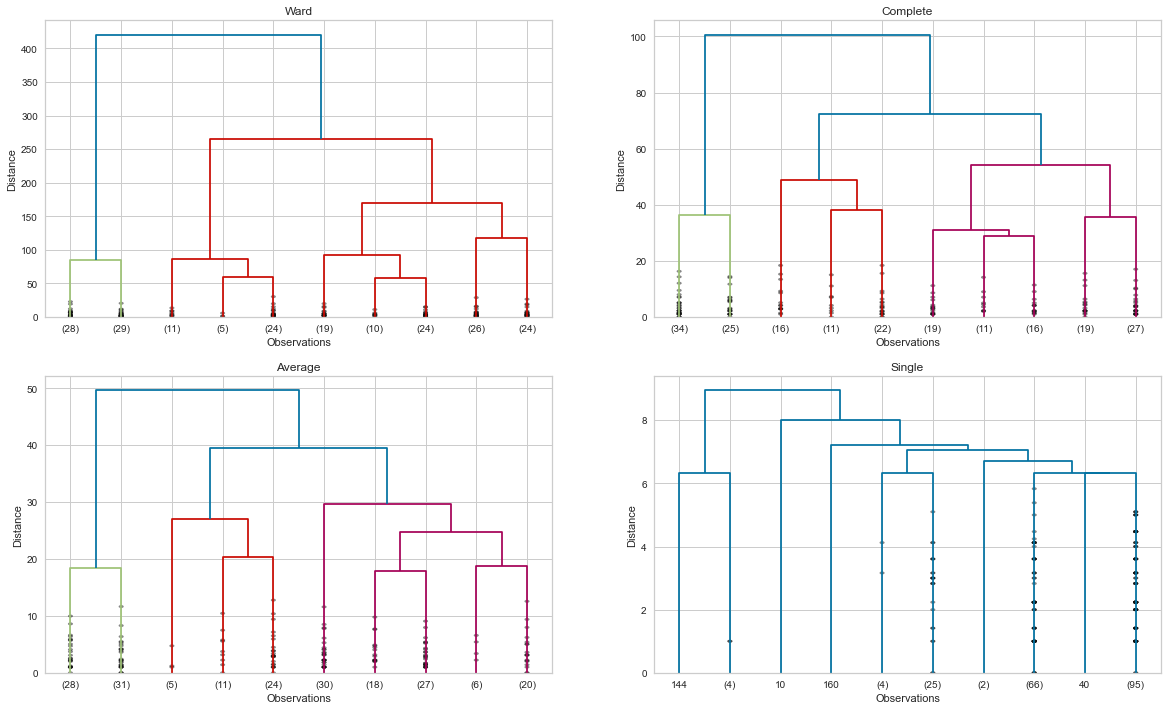

In [78]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

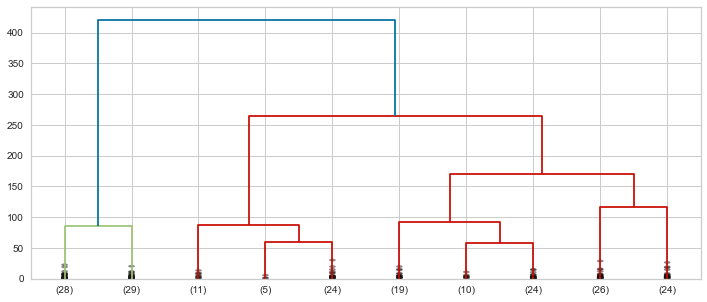

In [79]:
plt.figure(figsize = (12,5))
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

In [80]:
from sklearn.cluster import AgglomerativeClustering

In [81]:
from sklearn.metrics import silhouette_score

In [82]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091
Silhouette Score for 10 clusters: 0.3876666104778445


In [83]:
model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X1)

In [84]:
df["clusterx1_h"] = clusters
df.head()

,Gender,Age,Annual_Income,Spending_Score,clusterx1_k,clusterx2_k,clusterx1_h
0,Male,19,15,39,3,2,0
1,Male,21,15,81,2,3,3
2,Female,20,16,6,1,2,2
3,Female,23,16,77,2,3,3
4,Female,31,17,40,3,2,0


In [85]:
df.clusterx1_h.unique()

array([0, 3, 2, 1])

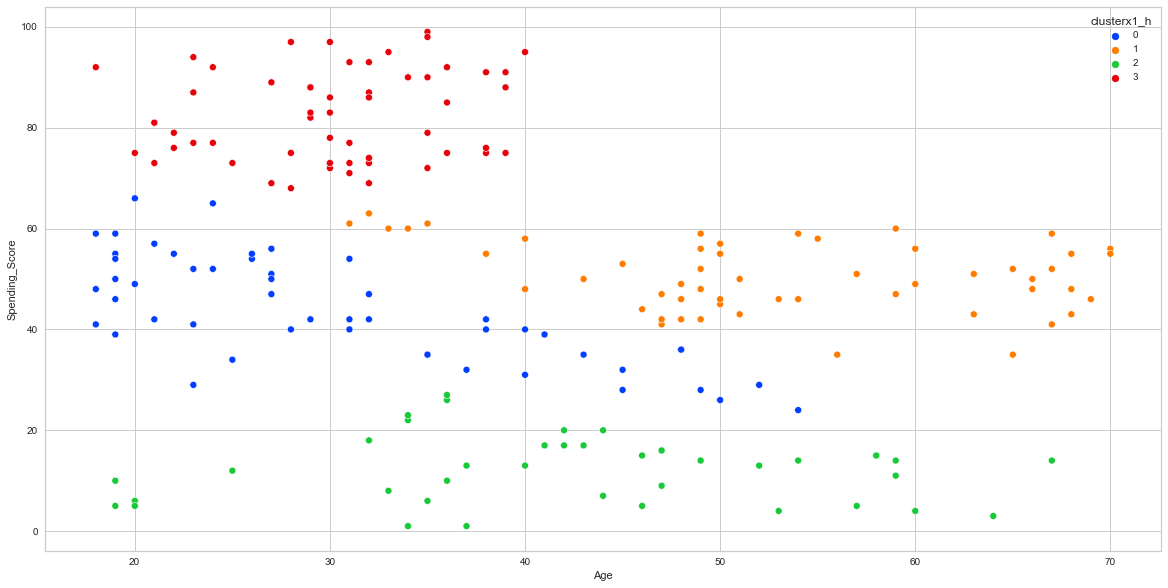

In [86]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='Age', y='Spending_Score', hue = df.clusterx1_h, data=df ,palette="bright")
plt.show()

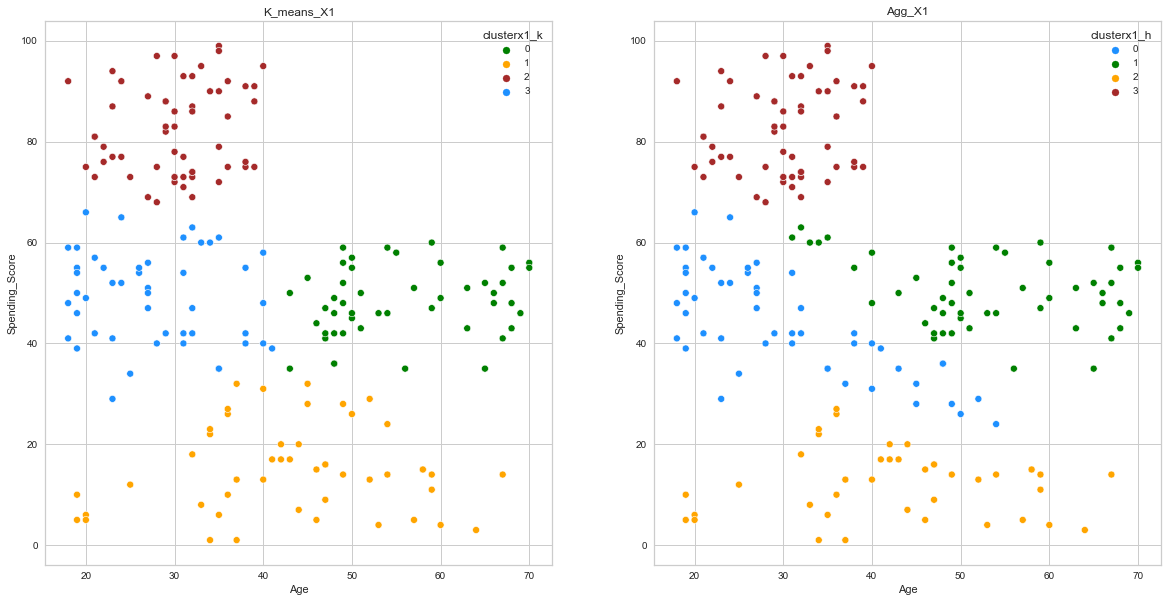

In [87]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score', hue='clusterx1_k', data=df, palette=['green', 'orange', 'brown',
                                                                                     'dodgerblue'])
plt.title("K_means_X1")

plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='clusterx1_h', data=df, palette=['dodgerblue', 'green',
                                                                                  'orange', 'brown'])
plt.title("Agg_X1")
plt.show()

## Clustering based on Annual Income and Spending Score- x2

In [88]:
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [89]:
hc_ward = linkage(y=X2, method="ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

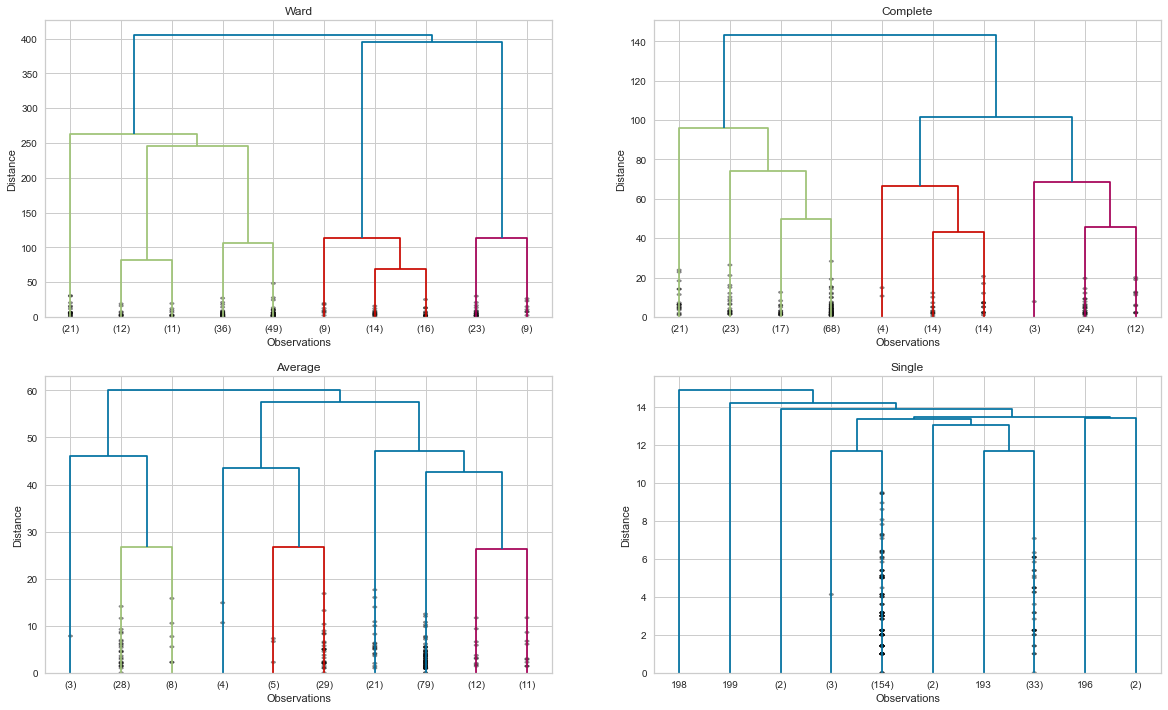

In [90]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

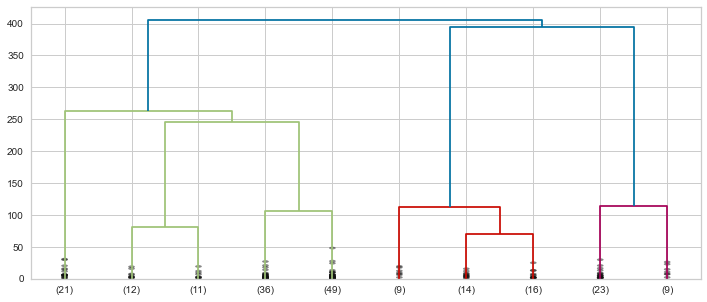

In [91]:
plt.figure(figsize = (12,5))
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

### ii. *Apply Agglomerative Clustering*

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [93]:
from sklearn.metrics import silhouette_score

In [94]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507
Silhouette Score for 10 clusters: 0.4342656377895271


with n_cluster=5:

In [95]:
model = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X2)

In [96]:
df["clusterx2_h"] = clusters
df.head()

,Gender,Age,Annual_Income,Spending_Score,clusterx1_k,clusterx2_k,clusterx1_h,clusterx2_h
0,Male,19,15,39,3,2,0,4
1,Male,21,15,81,2,3,3,3
2,Female,20,16,6,1,2,2,4
3,Female,23,16,77,2,3,3,3
4,Female,31,17,40,3,2,0,4


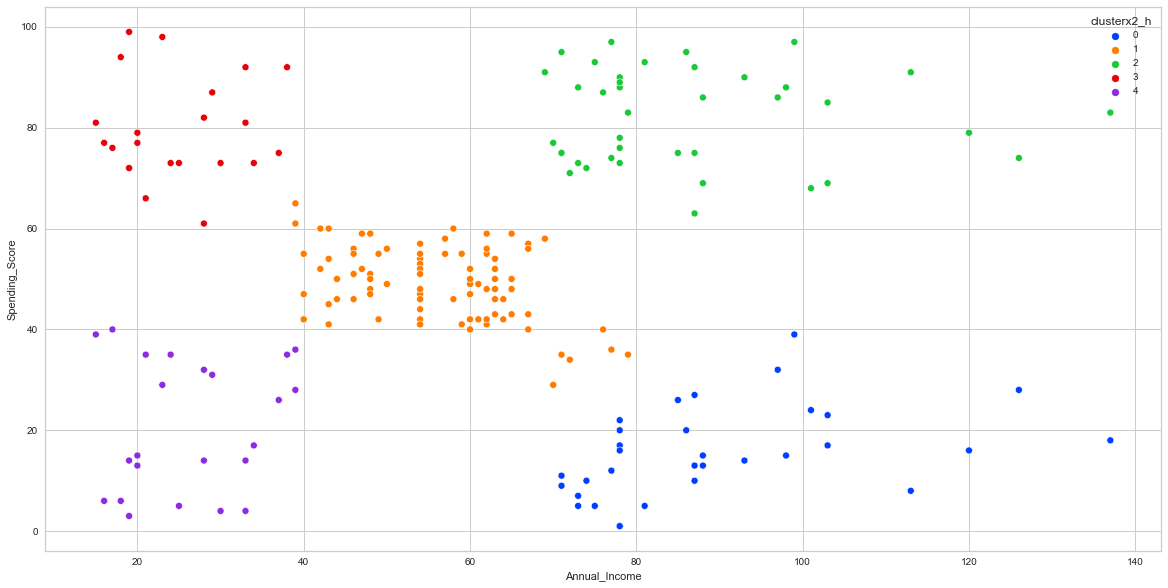

In [97]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Annual_Income', y='Spending_Score',
                hue=df.clusterx2_h, data=df, palette="bright")
plt.show()

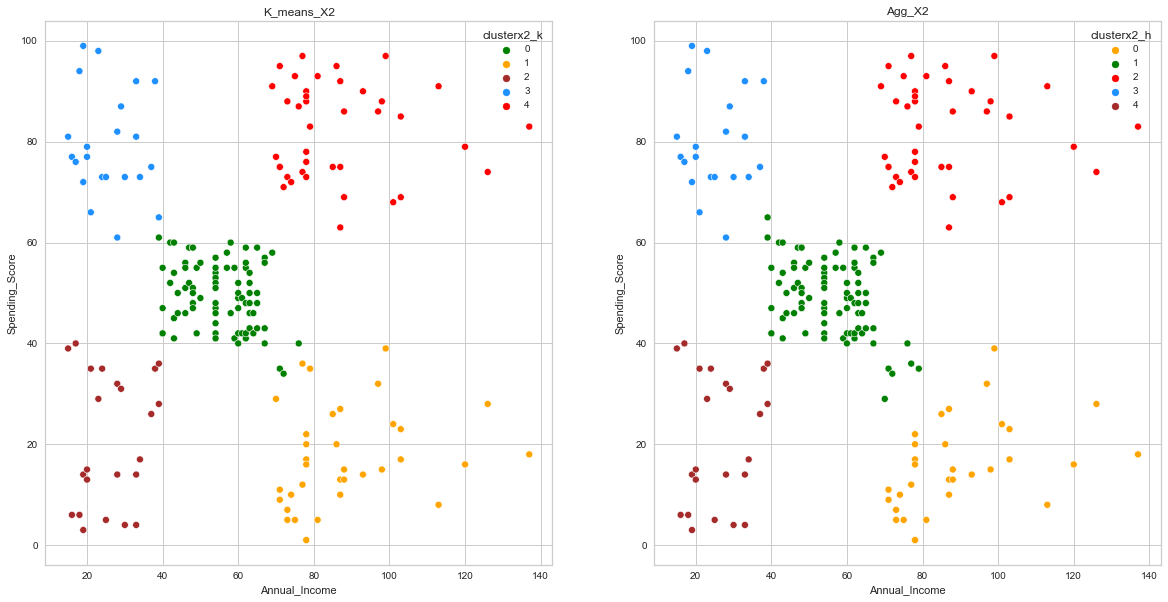

In [98]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='clusterx2_k', data=df, palette=['green', 'orange',
                                                                                  'brown', 'dodgerblue', 'red'])
plt.title("K_means_X2")

plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='clusterx2_h', data=df, palette=['orange', 'green',
                                                                                  'red', 'dodgerblue', 'brown'])
plt.title("Agg_X2")
plt.show()

### iii. *Visualizing and Labeling All the Clusters* 

In [99]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,clusterx1_k,clusterx2_k,clusterx1_h,clusterx2_h
0,Male,19,15,39,3,2,0,4
1,Male,21,15,81,2,3,3,3
2,Female,20,16,6,1,2,2,4
3,Female,23,16,77,2,3,3,3
4,Female,31,17,40,3,2,0,4


In [100]:
X_h = df[['Age', 'Annual_Income','Spending_Score']]
X_h.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [102]:
hc_ward = linkage(y = X_h, method="ward")
hc_complete = linkage(X_h, "complete")
hc_average = linkage(X_h, "average")
hc_single = linkage(X_h, "single")

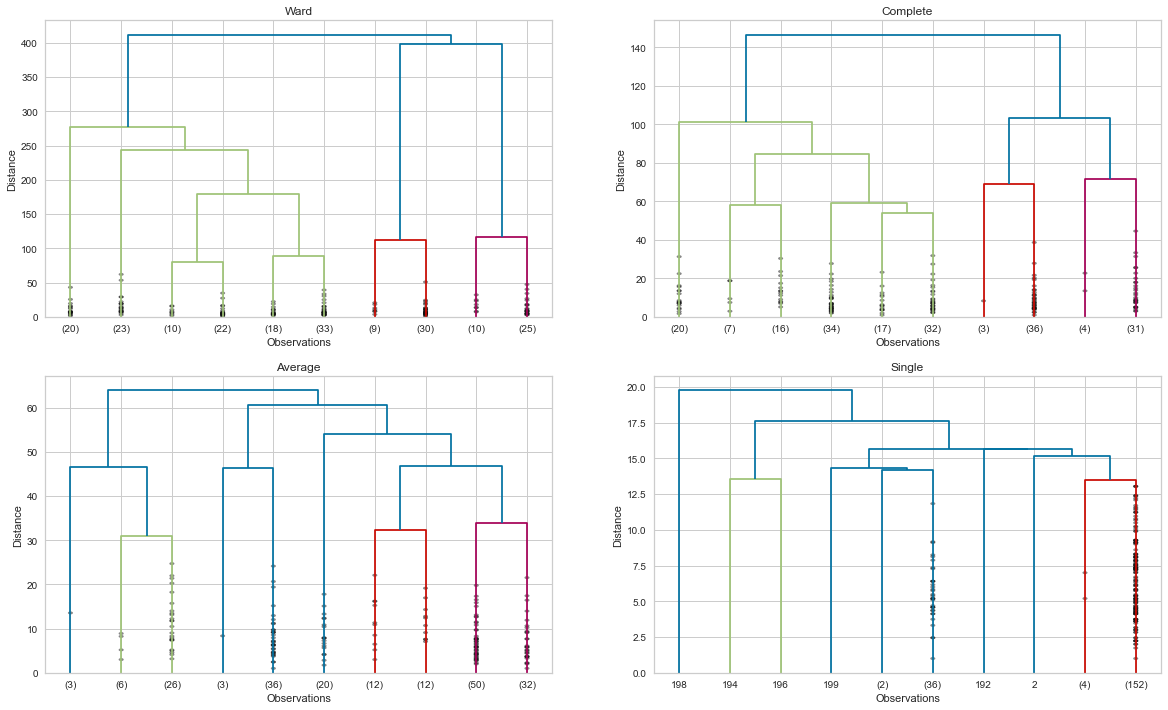

In [104]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()


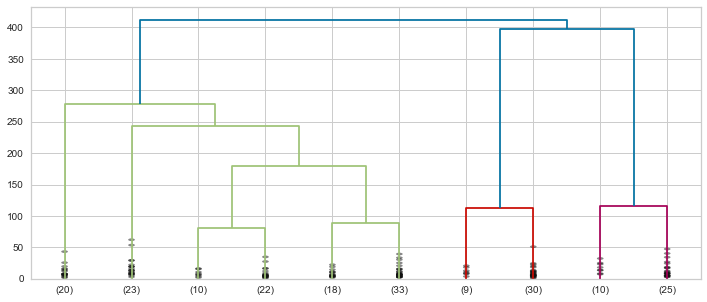

In [105]:
plt.figure(figsize=(12, 5))
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

In [106]:
from sklearn.cluster import AgglomerativeClustering

In [107]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_h)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_h, model.labels_)}')

Silhouette Score for 2 clusters: 0.2992593203550994
Silhouette Score for 3 clusters: 0.38141795042544546
Silhouette Score for 4 clusters: 0.41037986351850747
Silhouette Score for 5 clusters: 0.4401889024290193
Silhouette Score for 6 clusters: 0.44308912983504156
Silhouette Score for 7 clusters: 0.4262301125101286
Silhouette Score for 8 clusters: 0.41028404899198817
Silhouette Score for 9 clusters: 0.3663955117052502
Silhouette Score for 10 clusters: 0.351820333160781


In [108]:
model = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X_h)

In [109]:
X_h["clusters"] = clusters
X_h.head()

,Age,Annual_Income,Spending_Score,clusters
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

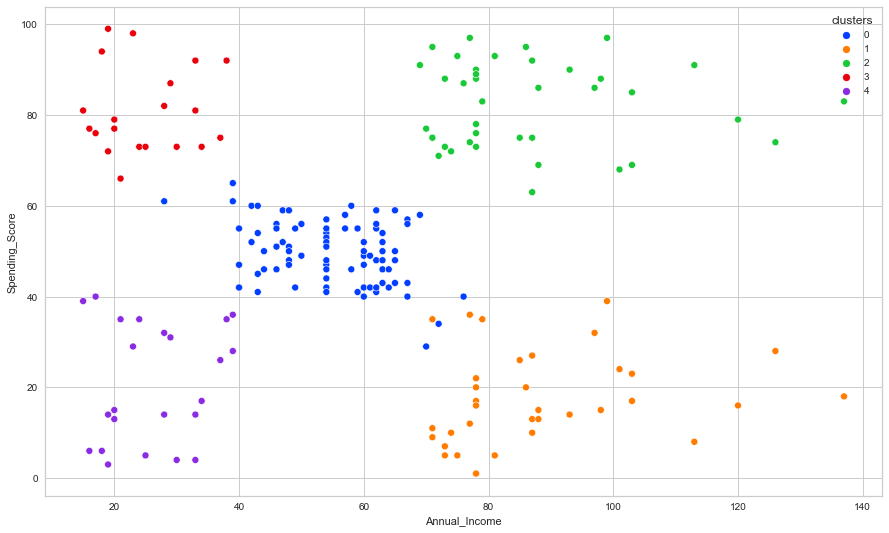

In [110]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x='Annual_Income', y='Spending_Score',
                hue='clusters', data=X_h, palette="bright")

<Figure size 1080x648 with 0 Axes>

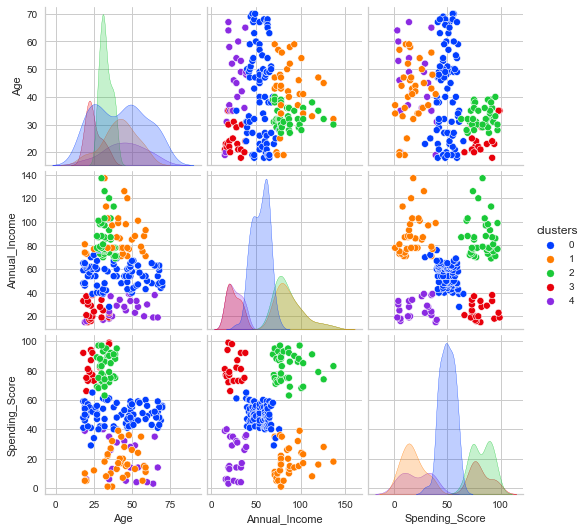

In [111]:
plt.figure(figsize=(15, 9))
sns.pairplot(hue='clusters', data=X_h, palette="bright")
plt.show()

Interpretation based on Age and Spending_score X1

In [112]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,clusterx1_k,clusterx2_k,clusterx1_h,clusterx2_h
0,Male,19,15,39,3,2,0,4
1,Male,21,15,81,2,3,3,3
2,Female,20,16,6,1,2,2,4
3,Female,23,16,77,2,3,3,3
4,Female,31,17,40,3,2,0,4


In [113]:
df.clusterx1_k.value_counts()

2    57
1    48
0    48
3    47
Name: clusterx1_k, dtype: int64

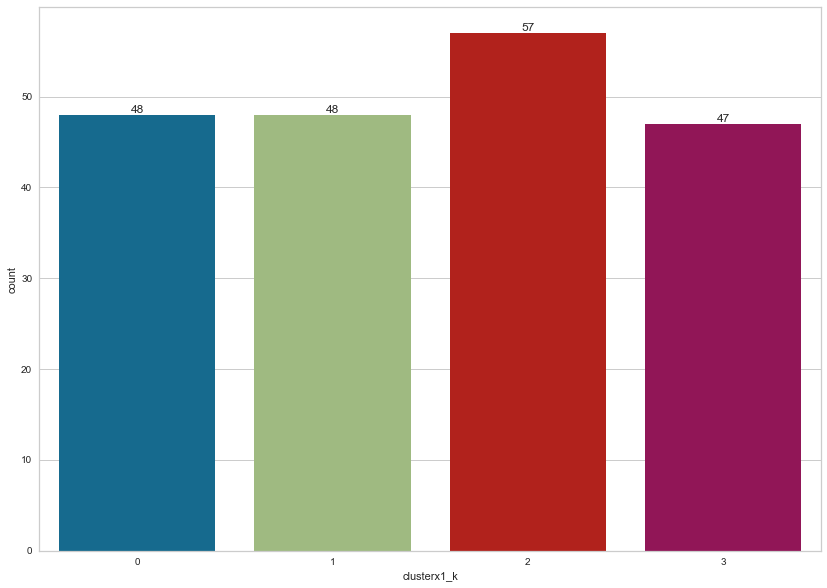

In [114]:
plt.figure(figsize=(14, 10))

ax = sns.countplot(data=df, x='clusterx1_k')
for p in ax.containers:
    ax.bar_label(p)
plt.show()

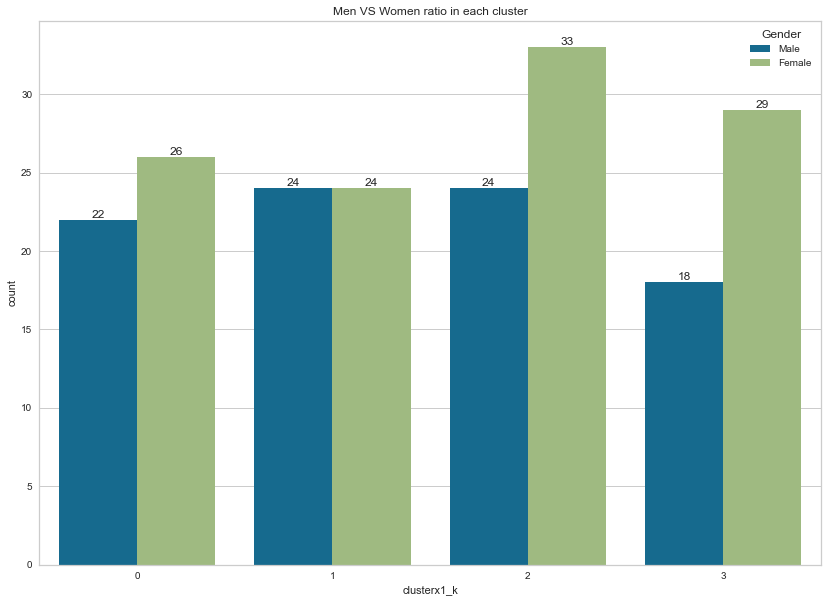

In [115]:
plt.figure(figsize=(14, 10))
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.clusterx1_k, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
plt.show()

In [116]:
df.drop(['clusterx2_k', 'clusterx1_h', 'clusterx2_h'],
        axis=1).groupby("clusterx1_k").mean()

,Age,Annual_Income,Spending_Score
clusterx1_k,,,
0,55.708333,54.770833,48.229167
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,27.617021,53.276596,49.148936


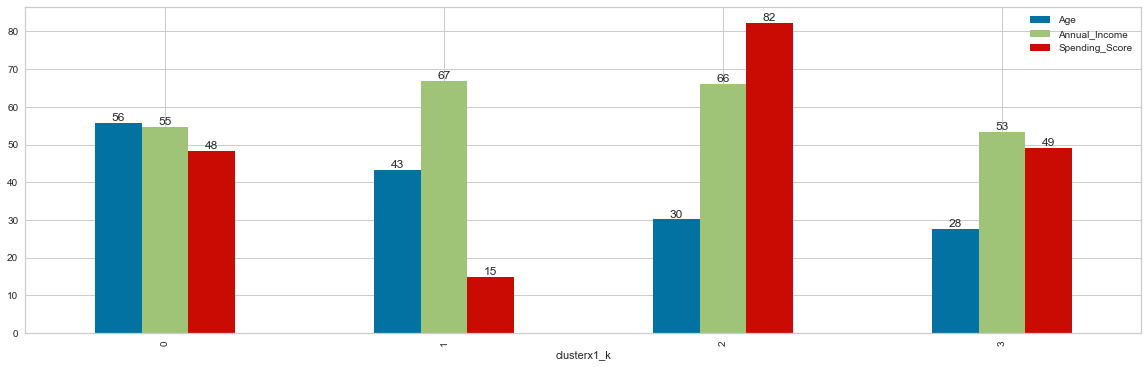

In [117]:
ax = df.drop(['clusterx2_k', 'clusterx1_h', 'clusterx2_h'], axis=1).groupby("clusterx1_k").mean().plot(
    kind='bar', figsize=(20, 6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")
plt.show()

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [118]:
df.clusterx2_k.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: clusterx2_k, dtype: int64

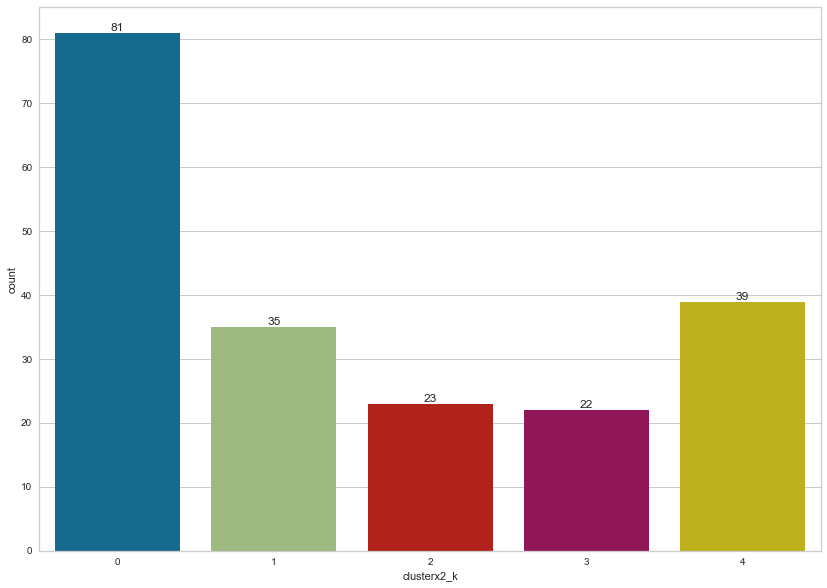

In [119]:
plt.figure(figsize=(14, 10))

ax = sns.countplot(data=df, x='clusterx2_k')
for p in ax.containers:
    ax.bar_label(p)
plt.show()

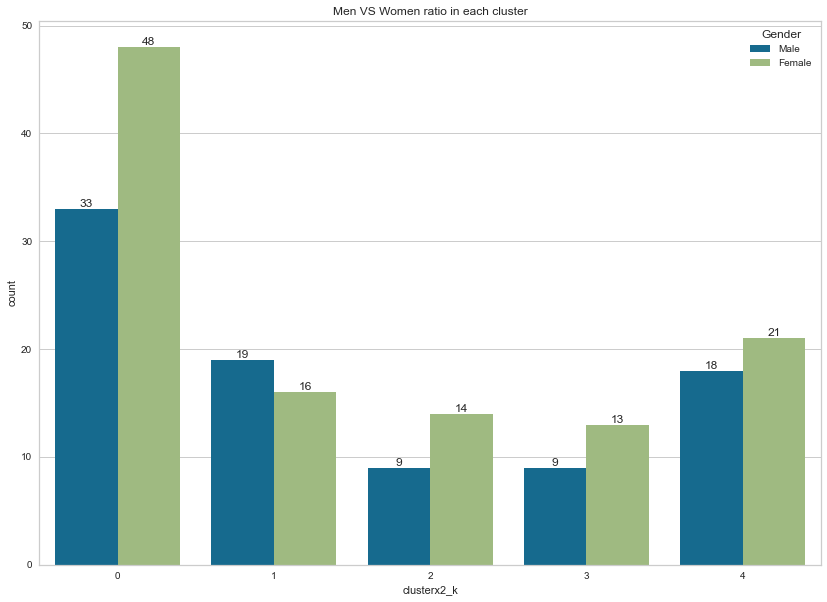

In [120]:
plt.figure(figsize=(14, 10))
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.clusterx2_k, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
plt.show()

In [121]:
df.drop(['clusterx1_k', 'clusterx1_h', 'clusterx2_h'],
        axis=1).groupby("clusterx2_k").mean()

,Age,Annual_Income,Spending_Score
clusterx2_k,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


In [122]:
df.groupby(["Gender", "clusterx2_k"]).mean()


Age  Annual_Income  Spending_Score  clusterx1_k  clusterx1_h  clusterx2_h
Gender clusterx2_k                                                                                 
Female 0            40.895833      55.354167       49.000000     1.500000     0.562500     1.000000
       1            43.250000      90.937500       22.062500     1.187500     1.312500     0.125000
       2            43.214286      27.357143       21.714286     1.214286     1.214286     4.000000
       3            25.461538      25.692308       80.538462     2.076923     2.769231     2.846154
       4            32.190476      86.047619       81.666667     2.000000     3.000000     2.000000
Male   0            45.363636      55.212121       50.272727     1.181818     0.666667     1.000000
       1            39.315789      85.894737       12.947368     0.947368     1.789474     0.052632
       2            48.333333      24.666667       19.666667     1.333333     1.111111     4.000000
       3            25.000000      25.777778       77.666667     2.222222     2.444444     3.000000
       4            33.277778      87.111111       82.666667     2.055556     2.888889     2.000000

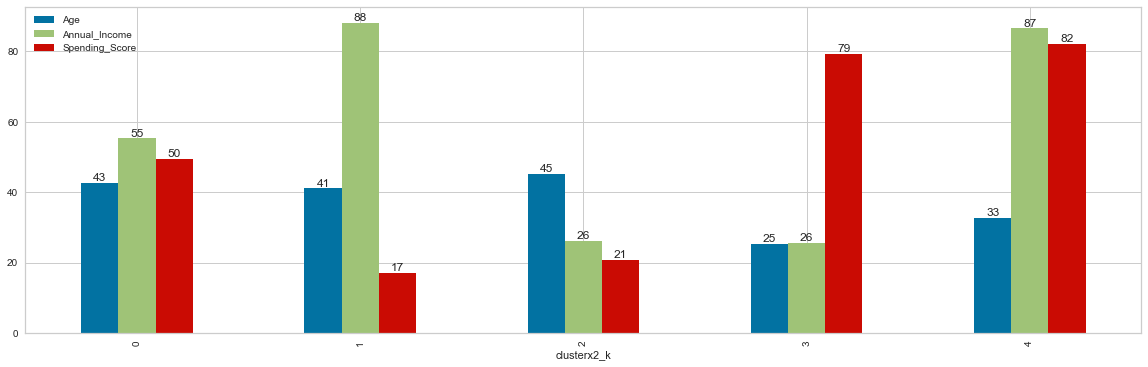

In [123]:
ax = df.drop(['clusterx1_k', 'clusterx1_h', 'clusterx2_h'], axis=1).groupby("clusterx2_k").mean().plot(
    kind='bar', figsize=(20, 6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")
plt.show()

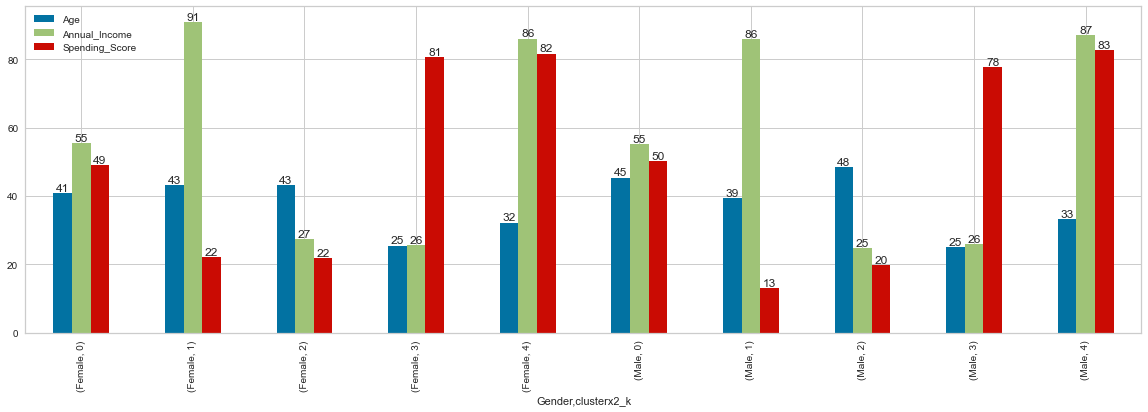

In [124]:
ax = df.drop(['clusterx1_k', 'clusterx1_h', 'clusterx2_h'], axis=1).groupby(["Gender", "clusterx2_k"]).mean().plot(
    kind='bar', figsize=(20, 6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")
plt.show()

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___